# KNN NOTES

*  Not a model thats widely used 
*  One of the simplest ML algos.
*  Assigns a label to new data ased on the distance between the old data and new data.
*  K = 1 (1st closest point), K=3 (3 points) etc
*  if new point is tied: either choose odd number K, randomly break tie or choose nearest class point (K=1)

* in skikit learn, in the result of a tie, the decision will be based on the ordering of the data
* ... whatever appears first in set of neighbors as results are ordered by distance. - chooses nearest point

*  how to choose best value of K. or rather optimal k.
*  Choose K value which minimizes error 
*  Error = 1 - Accuracy 

# Two Methods to find optimal K value

1. Elbow  Method (MANUAL METHOD)
* Basically train model on varying K values and evaluate for best value/ markdown for best error value.
* Sharp reduction in graph but then an elbow point where reduction becomes reduced per value of K

2. Cross Validation (RECOMMENDED METHOD) in combination with Grid Search


# How KNN works
* Choose K value
* Sort feature vectors (N dimensional space ) by distance metric
* Choose class based on K nearest Feature vectors.

## KNN CONSIDERATIONS
* Distance Metric: Many ways to measure distance:
        * Minkowski
        * Euclidean
        * Manhattan
        * Chebyshev

*  Should we scale distance?
*  Scale data before running KNN 

# HOW TO PERFORM KNN

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("DATA\gene_expression.csv")

In [11]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


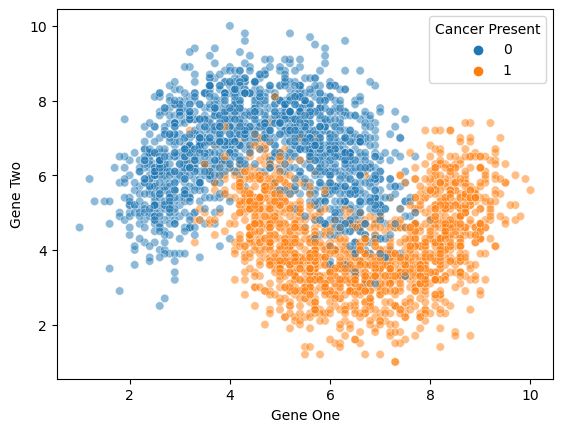

In [17]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5)
plt.show()

In [16]:
len(df)

3000

Text(0.5, 0, 'Cancer Present')

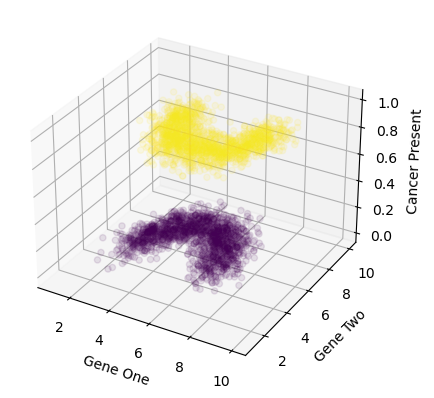

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Gene One'],df['Gene Two'],df['Cancer Present'],c=df['Cancer Present'],alpha=0.1)


ax.set_xlabel('Gene One')
ax.set_ylabel('Gene Two')
ax.set_zlabel('Cancer Present')

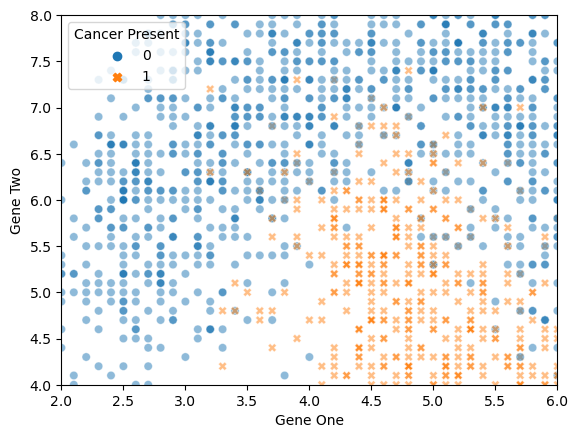

In [30]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)
plt.show()


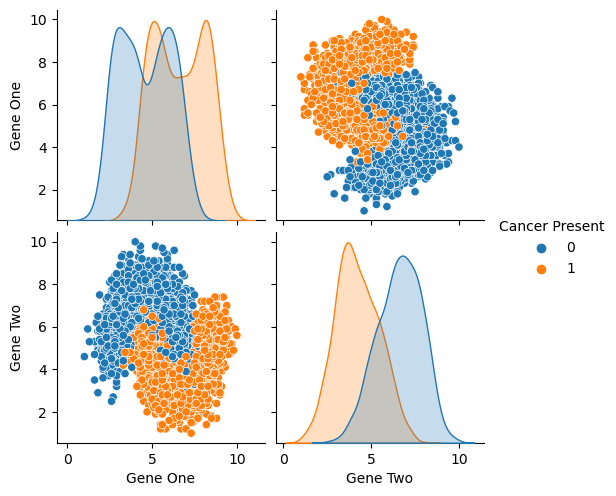

In [31]:
sns.pairplot(data=df,hue='Cancer Present')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X= df.drop('Cancer Present',axis=1)

In [34]:
y= df['Cancer Present']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#help(KNeighborsClassifier)

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn_model.fit(scaled_X_train,y_train) #fit model on scaled X train and y train.

KNeighborsClassifier(n_neighbors=1)

In [43]:
#predicted values
y_pred = knn_model.predict(scaled_X_test)

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


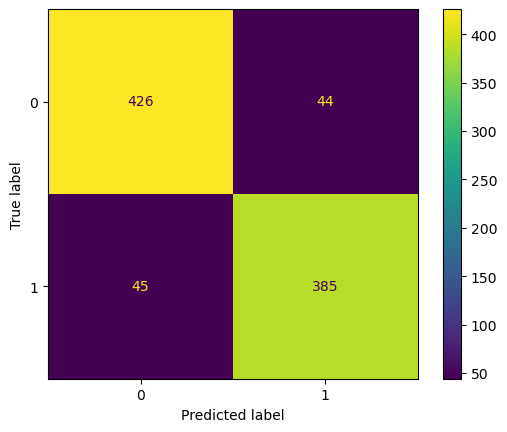

In [49]:
plot_confusion_matrix(knn_model,scaled_X_test,y_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



## BUT WHAT IS THE MOST OPTIMAL n_neighbours value?

In [53]:
#Choosing K

In [55]:
#Will explore both Elbow method & Cross Validation Grid Search

In [59]:
# Will also touch on Pipleine object in scikit-learn to sequence repeated operations such as scaler and model

from sklearn.metrics import accuracy_score

In [69]:
#1.Elbow method - manual method

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [70]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Neighbor')

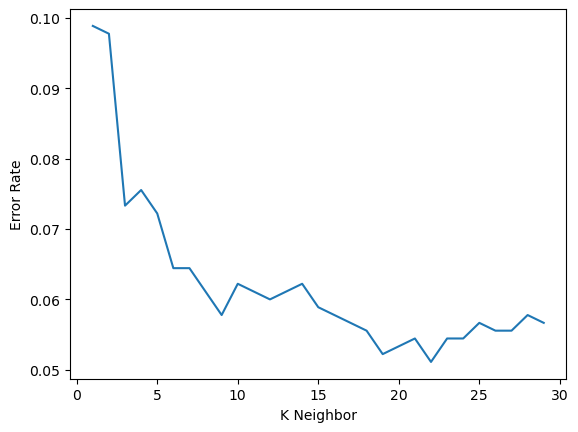

In [71]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbor')